In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torchvision import datasets
from transformers import AutoTokenizer, AutoModel
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import math

In [91]:
path="other model test results.csv"
models_loader = pd.read_csv(
    path,
    sep=';',
    names=['model_name',
           'case_noun',
           'degree_adj',
           'mood_verb',
           'number_adj',
           'number_noun',
           'number_psor_noun',
           'number_verb',
           'person_psor_noun',
           'person_verb',
           'tense_verb',
           'verbform_verb'
          ],
    quoting=3
)

In [92]:
models_loader

,model_name,case_noun,degree_adj,mood_verb,number_adj,number_noun,number_psor_noun,number_verb,person_psor_noun,person_verb,tense_verb,verbform_verb
0,BERT,case_noun,degree_adj,mood_verb,number_adj,number_noun,number_psor_noun,number_verb,person_psor_noun,person_verb,tense_verb,verbform_verb
1,embedding,0.9167,0.7164,0.6350,0.9450,0.8400,0.8650,0.9250,0.7164,0.9055,0.8250,0.9000
2,layer 1,0.9398,0.7662,0.8350,0.9650,0.8850,0.9050,0.9300,0.8955,0.9403,0.9250,0.9650
3,layer 2,0.9491,0.8209,0.8500,0.9750,0.8950,0.9200,0.9300,0.9005,0.9353,0.9300,0.9650
4,layer 3,0.9583,0.9055,0.8800,0.9750,0.9250,0.9300,0.9350,0.9104,0.9254,0.9400,0.9550
5,layer 4,0.9583,0.8806,0.8650,0.9700,0.9250,0.9400,0.9500,0.9254,0.9403,0.9200,0.9600
6,layer 5,0.9583,0.9204,0.8350,0.9700,0.9350,0.9500,0.9500,0.9005,0.9353,0.9050,0.9650
7,layer 6,0.9583,0.9403,0.8450,0.9700,0.9500,0.9450,0.9450,0.9104,0.9303,0.9100,0.9700
8,layer 7,0.9630,0.9353,0.8250,0.9700,0.9550,0.9500,0.9550,0.9204,0.9154,0.9350,0.9750
9,layer 8,0.9630,0.9303,0.7500,0.9700,0.9450,0.9350,0.9450,0.9005,0.9055,0.9000,0.9800


In [93]:
roberta = models_loader.iloc[16:,0:]
roberta.set_index('model_name')

,case_noun,degree_adj,mood_verb,number_adj,number_noun,number_psor_noun,number_verb,person_psor_noun,person_verb,tense_verb,verbform_verb
model_name,,,,,,,,,,,
embedding,0.9537,0.6418,0.8700,0.9500,0.8950,0.9250,0.9500,0.8259,0.9552,0.9650,0.9500
layer 1,0.9491,0.7363,0.8550,0.9450,0.8950,0.9400,0.9450,0.8159,0.9453,0.9300,0.9550
layer 2,0.9630,0.8060,0.9250,0.9500,0.9300,0.9650,0.9500,0.9204,0.9502,0.9650,0.9700
layer 3,0.9630,0.8856,0.9150,0.9700,0.9350,0.9650,0.9600,0.9353,0.9602,0.9750,0.9750
layer 4,0.9630,0.9602,0.9000,0.9650,0.9550,0.9650,0.9600,0.9204,0.9652,0.9700,0.9700
layer 5,0.9630,0.9353,0.9150,0.9650,0.9550,0.9400,0.9700,0.9055,0.9701,0.9800,0.9800
layer 6,0.9676,0.9652,0.9200,0.9650,0.9700,0.9350,0.9650,0.8955,0.9751,0.9650,0.9850
layer 7,0.9676,0.9552,0.9250,0.9650,0.9600,0.9300,0.9750,0.8905,0.9751,0.9750,0.9900
layer 8,0.9630,0.9701,0.9300,0.9700,0.9700,0.9500,0.9650,0.9005,0.9701,0.9750,0.9950


In [94]:
bert = models_loader.iloc[1:14,0:]
bert.set_index('model_name')

,case_noun,degree_adj,mood_verb,number_adj,number_noun,number_psor_noun,number_verb,person_psor_noun,person_verb,tense_verb,verbform_verb
model_name,,,,,,,,,,,
embedding,0.9167,0.7164,0.6350,0.9450,0.8400,0.8650,0.9250,0.7164,0.9055,0.8250,0.9000
layer 1,0.9398,0.7662,0.8350,0.9650,0.8850,0.9050,0.9300,0.8955,0.9403,0.9250,0.9650
layer 2,0.9491,0.8209,0.8500,0.9750,0.8950,0.9200,0.9300,0.9005,0.9353,0.9300,0.9650
layer 3,0.9583,0.9055,0.8800,0.9750,0.9250,0.9300,0.9350,0.9104,0.9254,0.9400,0.9550
layer 4,0.9583,0.8806,0.8650,0.9700,0.9250,0.9400,0.9500,0.9254,0.9403,0.9200,0.9600
layer 5,0.9583,0.9204,0.8350,0.9700,0.9350,0.9500,0.9500,0.9005,0.9353,0.9050,0.9650
layer 6,0.9583,0.9403,0.8450,0.9700,0.9500,0.9450,0.9450,0.9104,0.9303,0.9100,0.9700
layer 7,0.9630,0.9353,0.8250,0.9700,0.9550,0.9500,0.9550,0.9204,0.9154,0.9350,0.9750
layer 8,0.9630,0.9303,0.7500,0.9700,0.9450,0.9350,0.9450,0.9005,0.9055,0.9000,0.9800


In [95]:
path="last_5_layer_results.csv"
hubert = pd.read_csv(
    path,
    sep=',',
    names=['model_name',
           'case_noun',
           'degree_adj',
           'mood_verb',
           'number_adj',
           'number_noun',
           'number_psor_noun',
           'number_verb',
           'person_psor_noun',
           'person_verb',
           'tense_verb',
           'verbform_verb'
          ],
    quoting=3
)
hubert=hubert.iloc[1:,:]
hubert.set_index('model_name')

,case_noun,degree_adj,mood_verb,number_adj,number_noun,number_psor_noun,number_verb,person_psor_noun,person_verb,tense_verb,verbform_verb
model_name,,,,,,,,,,,
embedding,0.9491,0.6866,0.845,0.95,0.865,0.945,0.955,0.8607,0.9602,0.905,0.95
Layer_1,0.9722,0.9303,0.985,0.985,0.975,0.96,0.965,0.904,0.9801,0.97,0.98
Layer_2,0.9769,0.9701,0.95,0.995,0.97,0.935,0.98,0.9353,0.9701,0.98,0.985
Layer_3,0.9769,0.9602,0.955,0.995,0.98,0.96,0.995,0.9303,0.9751,0.975,0.985
Layer_4,0.9769,0.9652,0.945,0.995,0.97,0.955,0.99,0.9104,0.9701,0.97,0.995
Layer_5,0.9769,0.9602,0.945,0.995,0.98,0.955,0.995,0.9154,0.9751,0.975,1
Layer_6,0.9769,0.9602,0.945,0.99,0.99,0.955,0.985,0.9104,0.9652,0.975,1
Layer_7,0.9769,0.9502,0.945,0.99,0.98,0.975,0.97,0.9303,0.9652,0.97,1
Layer_8,0.9769,0.9453,0.94,0.99,0.98,0.965,0.975,0.9055,0.9652,0.975,1


In [96]:
headers=hubert.columns[1:]
for h in headers:
    hubert[h]=pd.to_numeric(hubert[h], downcast="float")
    roberta[h]=pd.to_numeric(roberta[h], downcast="float")
    bert[h]=pd.to_numeric(bert[h], downcast="float")

In [97]:
plt.rcParams['figure.figsize'] = [15,20]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

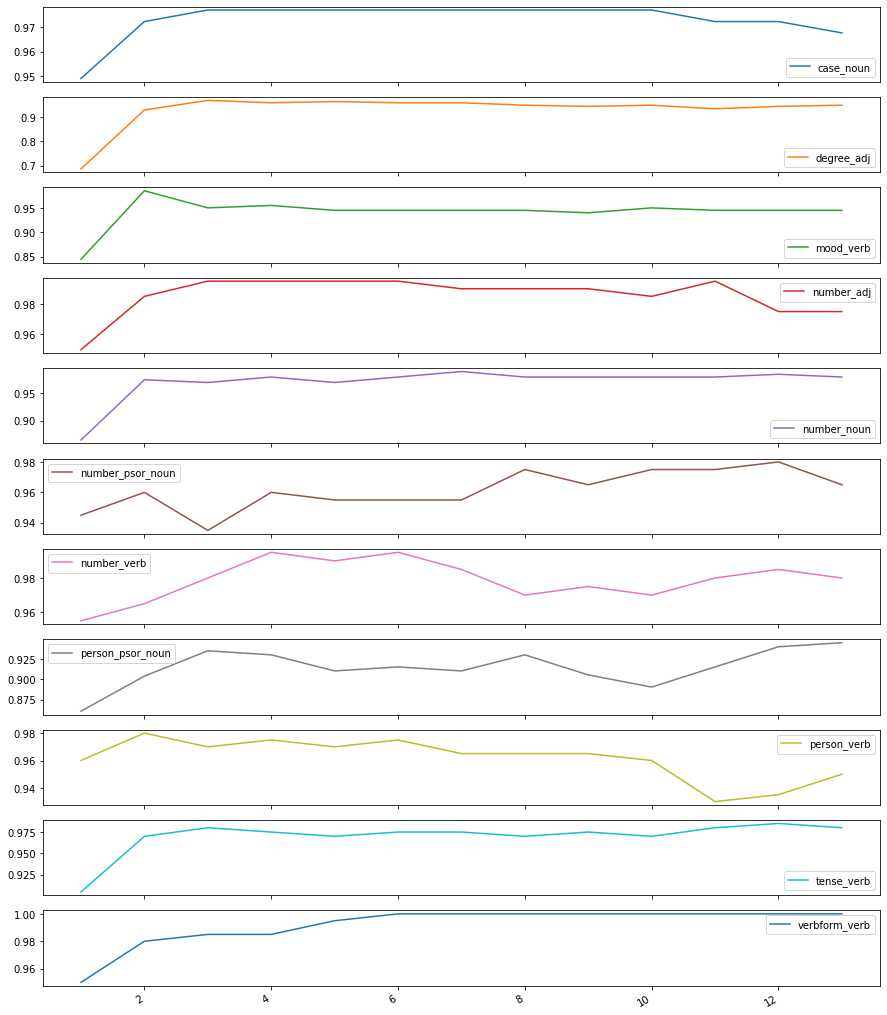

In [98]:
hubert.plot(subplots=True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

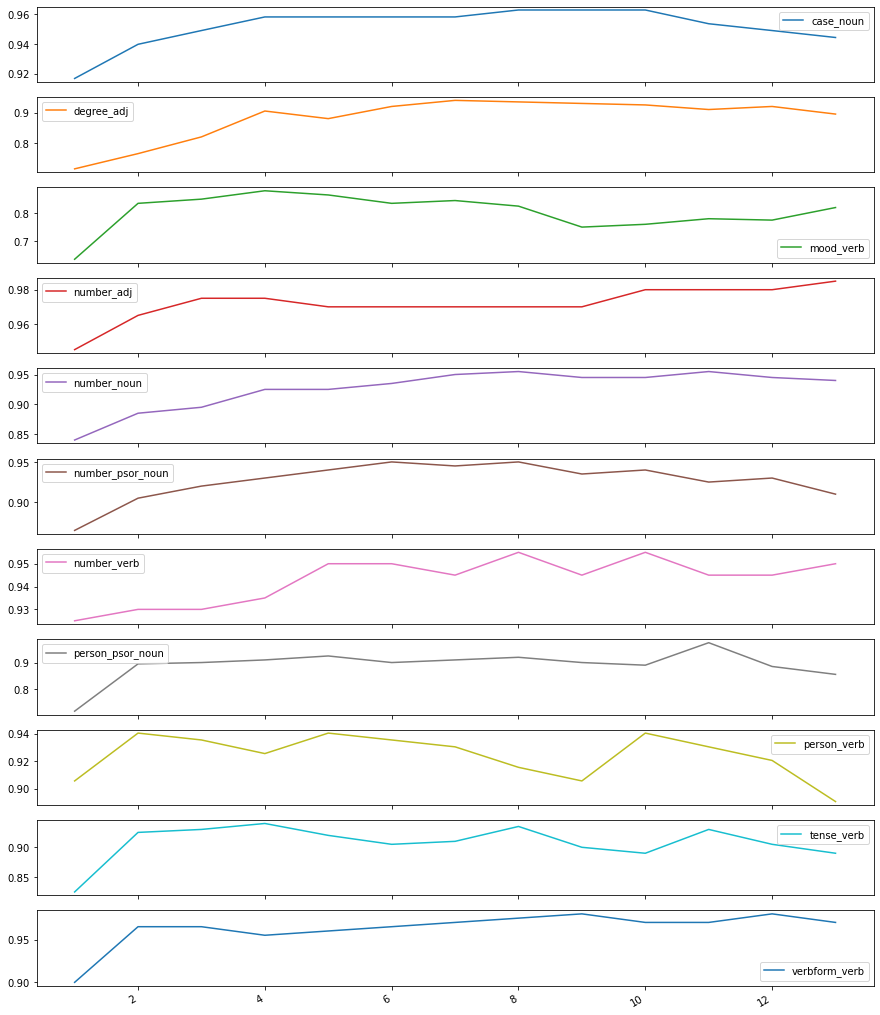

In [99]:
bert.plot(subplots=True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

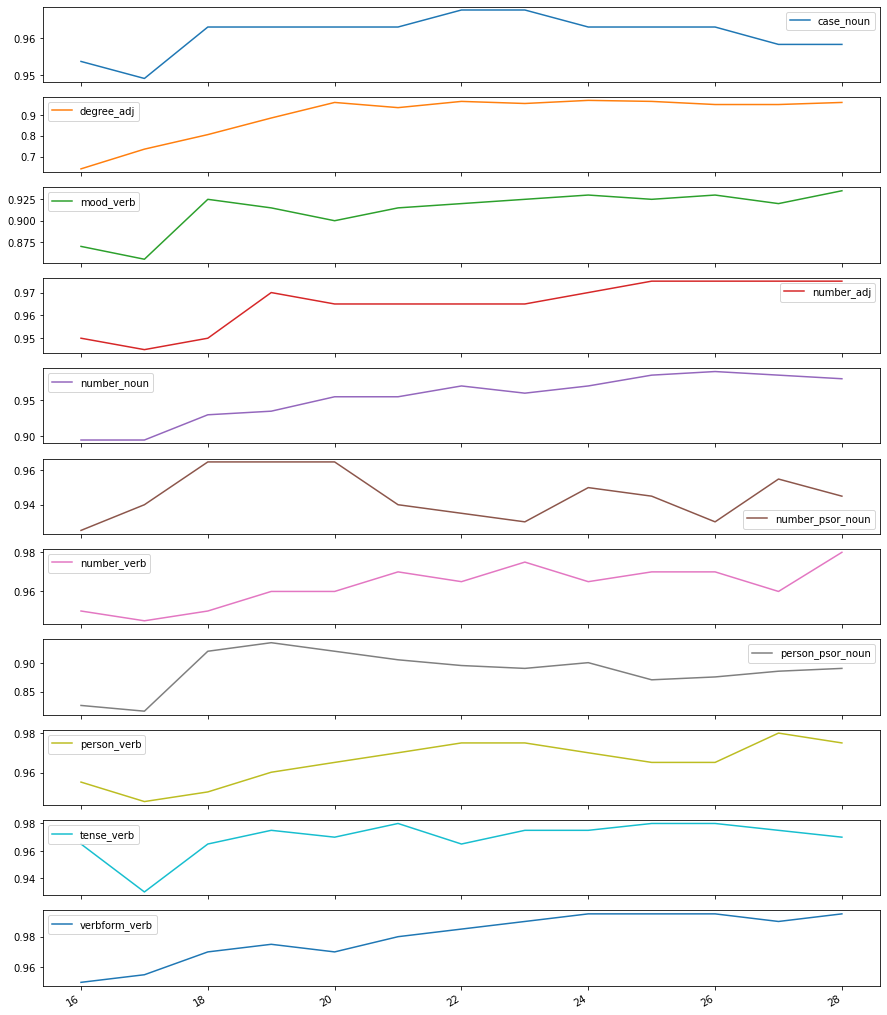

In [100]:
roberta.plot(subplots=True, fontsize=10)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


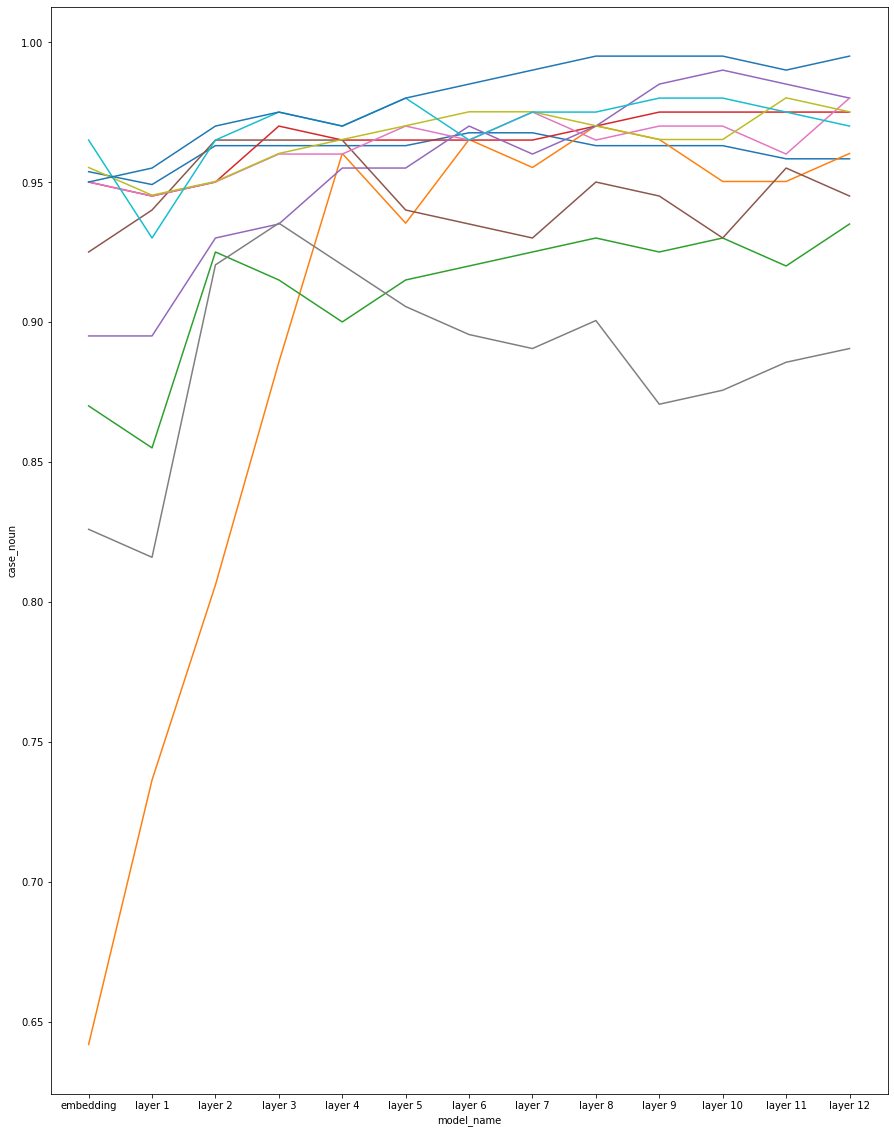

In [101]:
for h in headers:
    print(sns.lineplot(x=roberta["model_name"], y=roberta[h]))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


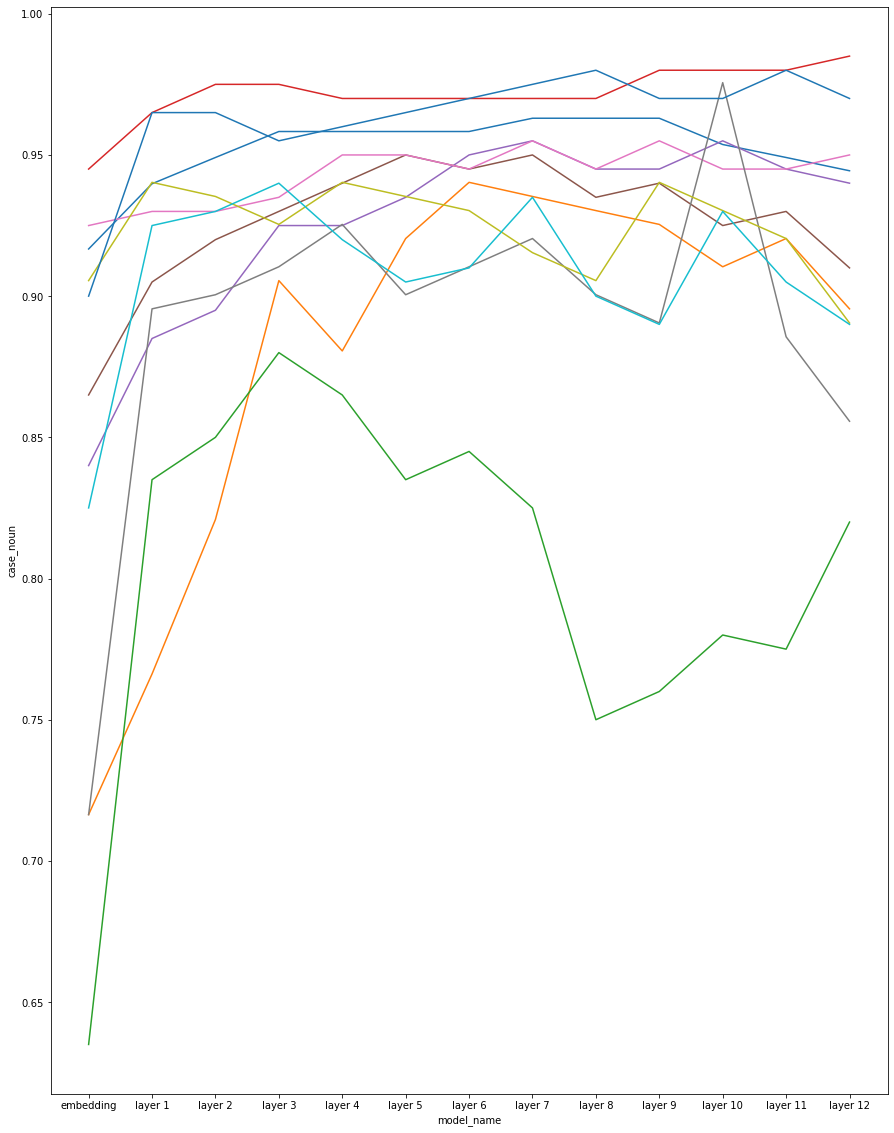

In [102]:
for h in headers:
    print(sns.lineplot(x=bert["model_name"], y=bert[h]))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


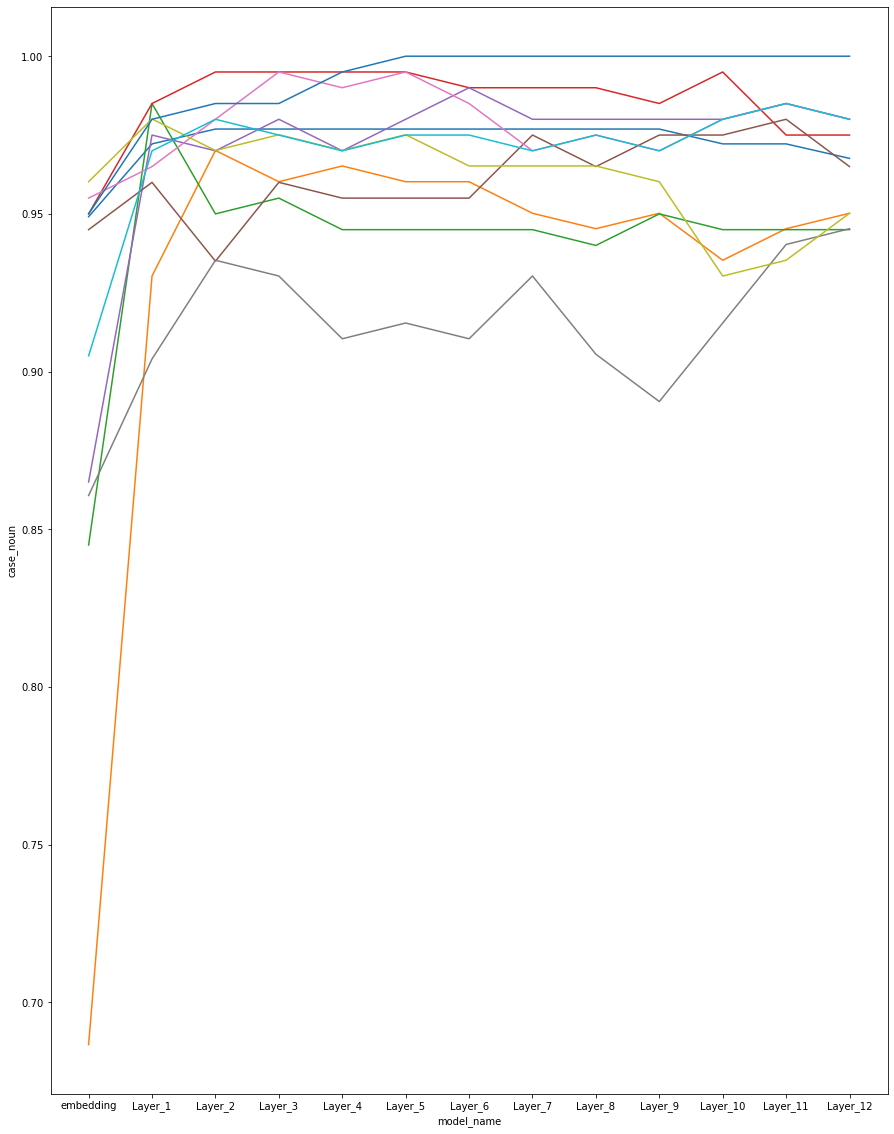

In [103]:
for h in headers:
    print(sns.lineplot(x=hubert["model_name"], y=hubert[h]))